In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Data Collection and Processing

In [56]:
#loading the dataset
data = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\exercise.csv")

In [57]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [58]:
data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11
14999,11751526,male,63,173,79,18,92,40.5,98


In [59]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [60]:
#finding null value
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [61]:
#getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
User_ID       15000 non-null int64
Gender        15000 non-null object
Age           15000 non-null int64
Height        15000 non-null int64
Weight        15000 non-null int64
Duration      15000 non-null int64
Heart_Rate    15000 non-null int64
Body_Temp     15000 non-null float64
Calories      15000 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [62]:
#checking the number of rows and columns
data.shape

(15000, 9)

### Data Visualization

In [63]:
sns.set()

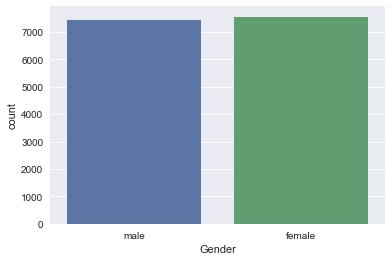

In [64]:
#plotting the gender column in count plot
sns.countplot(data['Gender'])

Data points are equally distributed

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


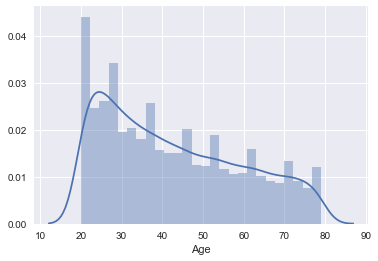

In [65]:
#finding the distribution of age column
sns.distplot(data['Age'])

More values are present in 20 to 30 Age

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


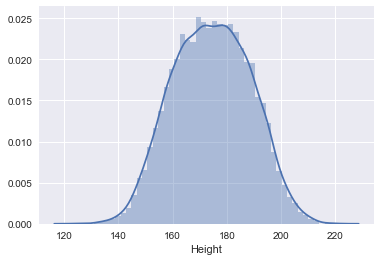

In [66]:
sns.distplot(data['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


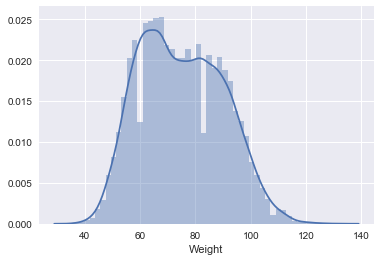

In [67]:
sns.distplot(data['Weight'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


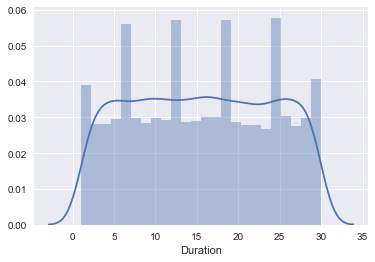

In [68]:
sns.distplot(data['Duration'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


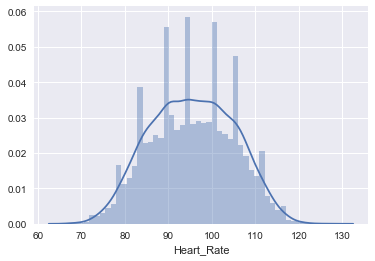

In [69]:
sns.distplot(data['Heart_Rate'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


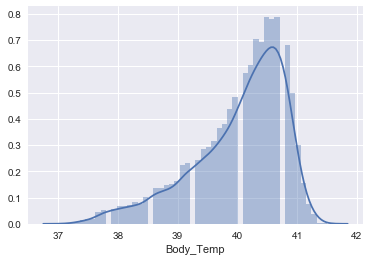

In [70]:
sns.distplot(data['Body_Temp'])

In [71]:
correlation = data.corr()

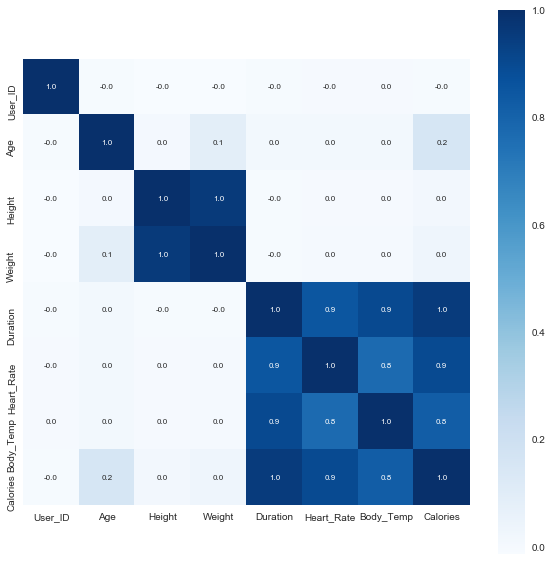

In [72]:
#constructing heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues',annot=True)

#### Converting categorical columns into numerical 

In [73]:
data.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [74]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


#### Lets separate features and Label

In [75]:
X = data.drop(columns=['Calories','User_ID'],axis=1)
Y = data['Calories']

In [76]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
5           1   36     151      50        23          96       40.7
6           1   33     158      56        22          95       40.5
7           0   41     175      85        25         100       40.7
8           0   60     186      94        21          97       40.4
9           1   26     146      51        16          90       40.2
10          1   36     177      76         1          74       37.8
11          1   21     157      56        17         100       40.0
12          0   66     171      79        11          90       40.0
13          1   32     157      54        18    

#### Splitting data into training and test data

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [87]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


### Model Training

In [79]:
#XGBoost Regressor
#loading the model
model=XGBRegressor()

In [80]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', validate_parameters=1,
       verbosity=None)

#### Evaluate the Model

In [81]:
#prediction on the training data
train_prediction = model.predict(X_train)

In [82]:
test_prediction = model.predict(X_test)

##### Mean Absolute Error 

In [83]:
mae_1 = metrics.mean_absolute_error(Y_train,train_prediction)

In [84]:
print("Mean absolute error value: ",mae_1)

Mean absolute error value:  0.9656331550205747


In [85]:
mae_2 = metrics.mean_absolute_error(Y_test,test_prediction)

In [86]:
print("Mean absolute error value: ",mae_2)

Mean absolute error value:  1.4807048829992613
